## Parkinsons Disease Data Set
### Dataset information:
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

### Attribute Information:

Matrix column entries (attributes): 
* name - ASCII subject name and recording number 
* MDVP:Fo(Hz) - Average vocal fundamental frequency 
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency * MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency 
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy 
* RPDE,D2 - Two nonlinear dynamical complexity measures 
* DFA - Signal fractal scaling exponent * spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

## Import Necessary Libraries

In [49]:
# Importing pandas library and aliasing it as pd
import pandas as pd

# Importing numpy library and aliasing it as np
import numpy as np

# Importing matplotlib.pyplot module from matplotlib library and aliasing it as plt
import matplotlib.pyplot as plt

# Importing seaborn library and aliasing it as sns
import seaborn as sns

# Importing RandomForestClassifier from sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Importing cross_val_score function from sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# Importing train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Importing accuracy_score and confusion_matrix functions from sklearn.metrics module
from sklearn.metrics import accuracy_score, confusion_matrix

# Importing tree module from sklearn library
from sklearn import tree

# Importing system function from os module
from os import system

# To ignore warnings 
import warnings 

# Ignoring warnings by filtering them out
warnings.filterwarnings("ignore")

## Load the Dataset

In [50]:
data = pd.read_csv('parkinsson_disease.csv')

## Exploratory Data Analysis

In [51]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [52]:
data.shape

(195, 24)

In [53]:
#Moving status column to the last
df1=data.pop('status') 
data['status'] = df1

In [54]:

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [55]:
# There are 147 people affected with PD
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

## Univariate Analysis

<AxesSubplot:xlabel='PPE'>

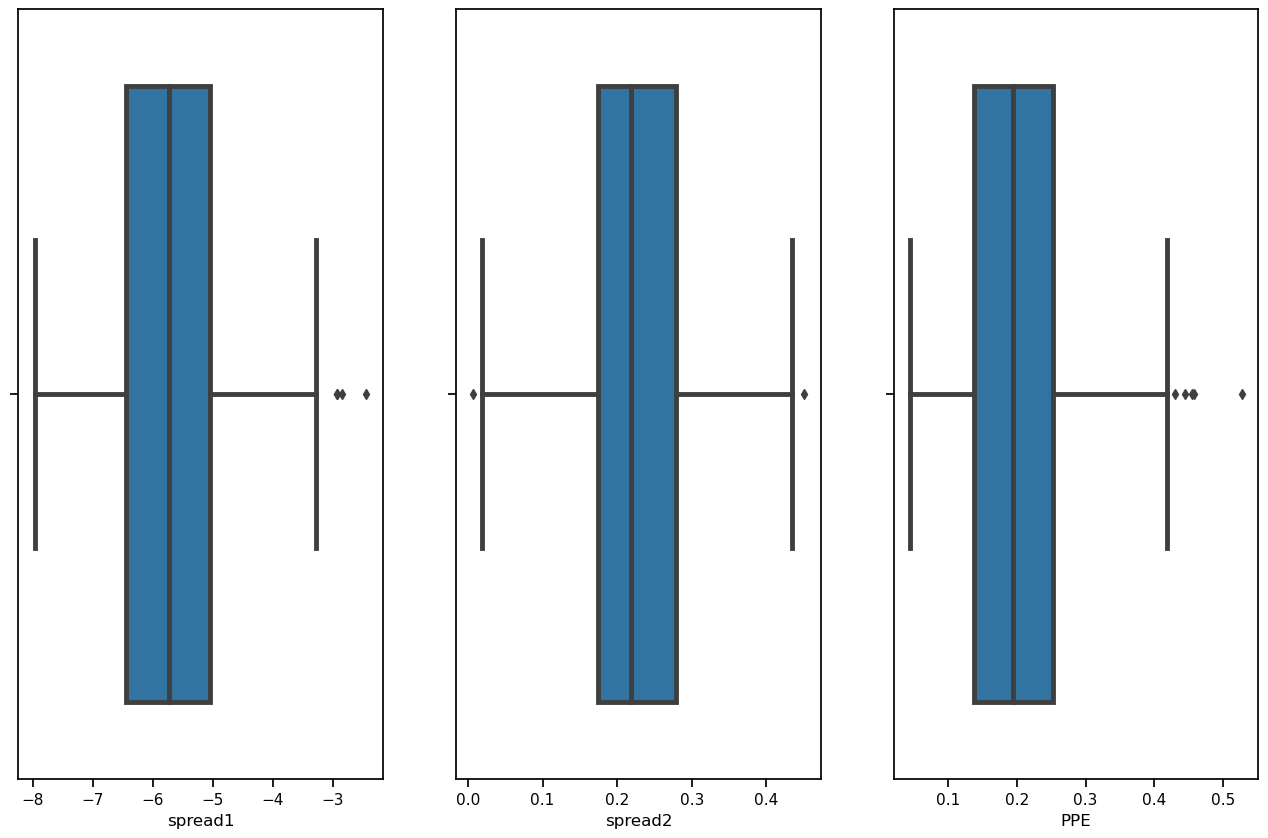

In [56]:
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x='spread1',data=data, ax=ax[0],orient='v') 
sns.boxplot(x='spread2',data=data, ax=ax[1],orient='v')
sns.boxplot(x='PPE',data=data,ax=ax[2],orient='v')

The above figure shows the box plot of the frequency variation. All the three variations have outliers.
Generally speaking, decision trees are able to handle outliers. It is very unlikely that decision tree will create a leaf to isolate them

In [57]:
# dropping name column as this column is not much significant 
data = data.drop('name',axis=1)

<AxesSubplot:xlabel='MDVP:Fhi(Hz)', ylabel='Density'>

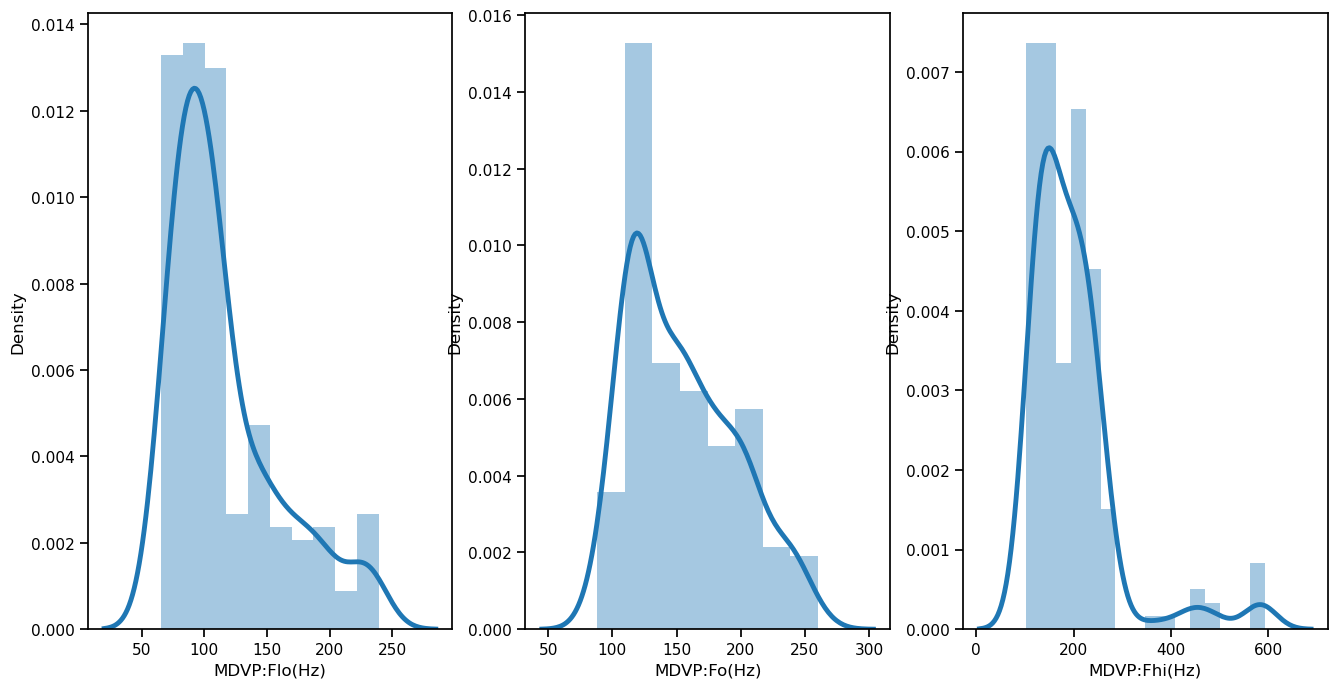

In [58]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(data['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(data['MDVP:Fhi(Hz)'],ax=ax[2])

The measures of vocal fundamental frequency are shown above. There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz. The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. The high vocal frequency does not have any skewness, but some range of values are at the right most tail

<AxesSubplot:xlabel='HNR', ylabel='Density'>

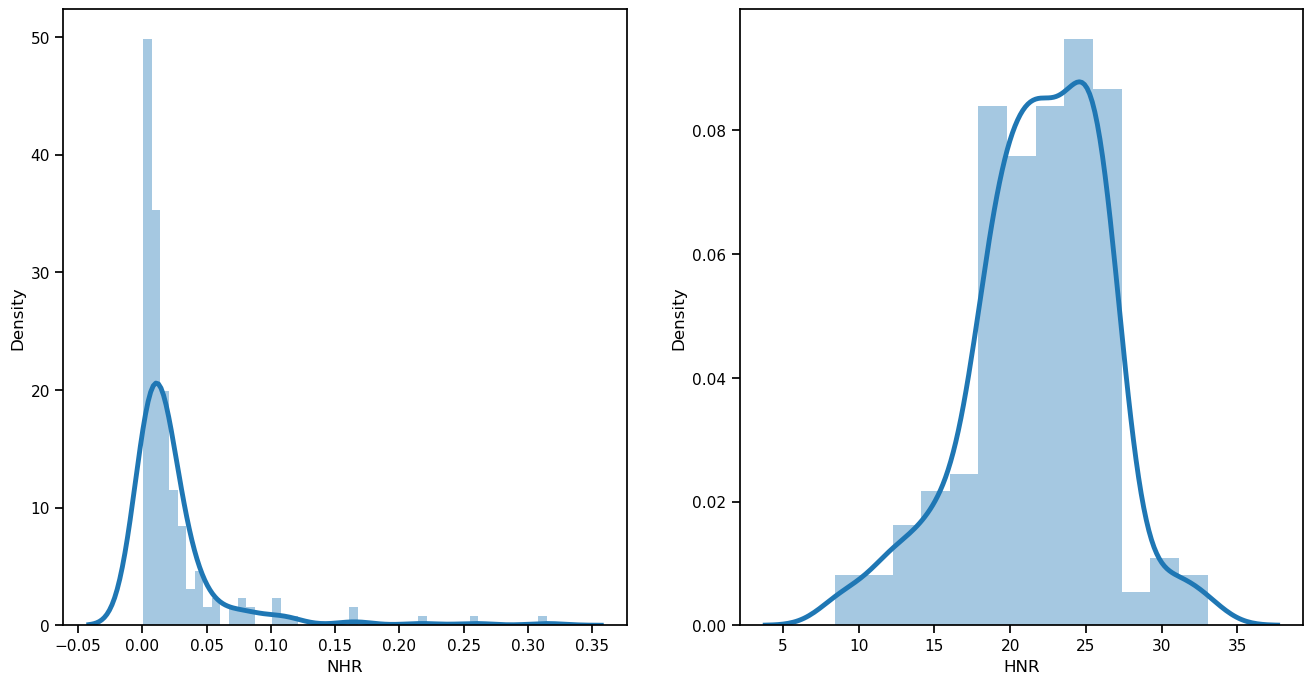

In [59]:
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(data['NHR'],ax=ax[0]) 
sns.distplot(data['HNR'],ax=ax[1])

The measure of tonal component of frequency is shown above. The value NHR is right skewed for there are so many observations in the area, but they seem to be with very minimal values. The maximum number of observations is between 0 and 0.04.
The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness

<AxesSubplot:xlabel='Shimmer:DDA', ylabel='Density'>

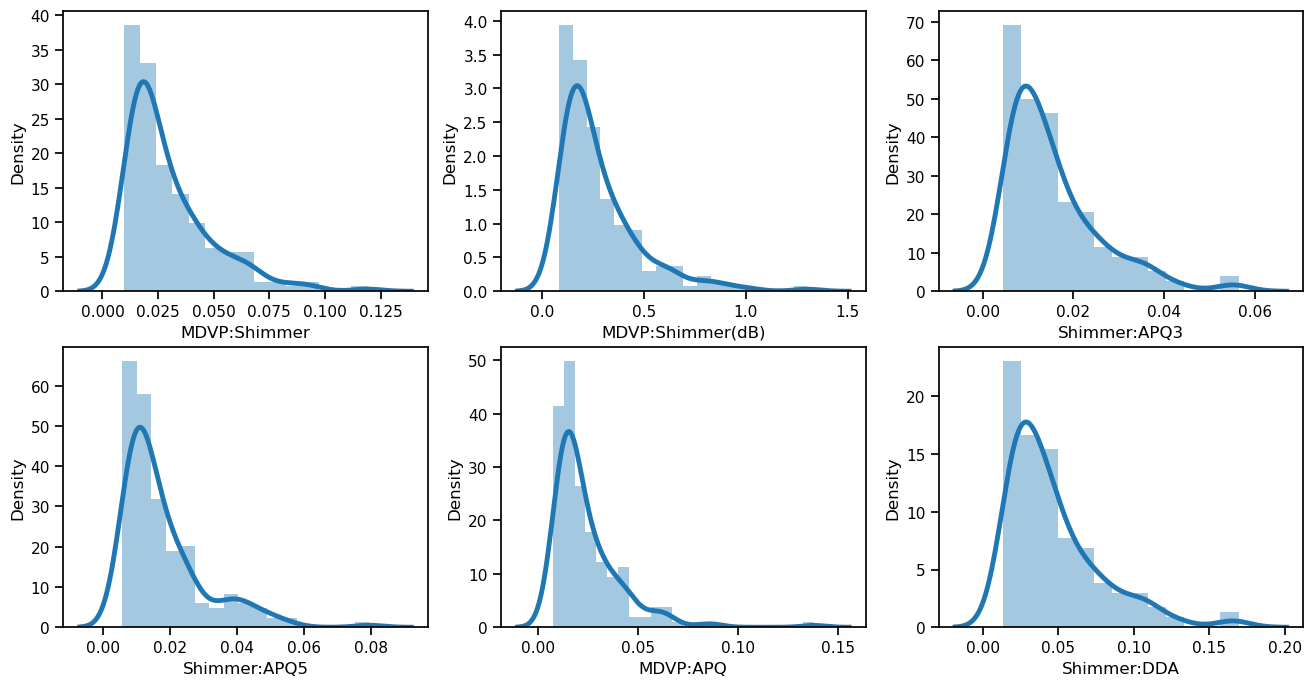

In [60]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(data['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(data['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(data['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(data['Shimmer:DDA'],ax=ax[1,2])

For all of the above graphs, we can observe that the measure of variation in amplitude is positively skewed

## Bi -Variate Analysis

<AxesSubplot:xlabel='spread1', ylabel='Density'>

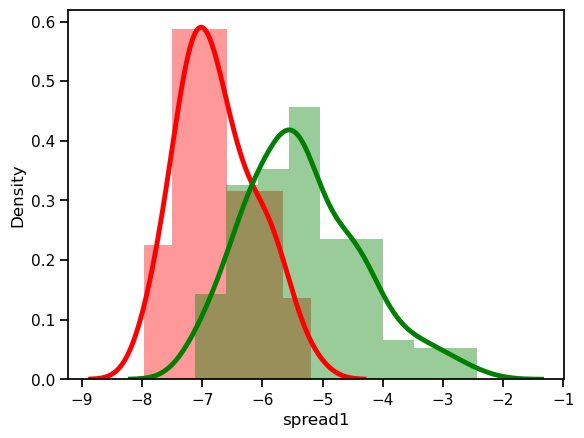

In [61]:
sns.distplot( data[data.status == 0]['spread1'], color = 'r')
sns.distplot( data[data.status == 1]['spread1'], color = 'g')

Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD

<AxesSubplot:xlabel='status', ylabel='HNR'>

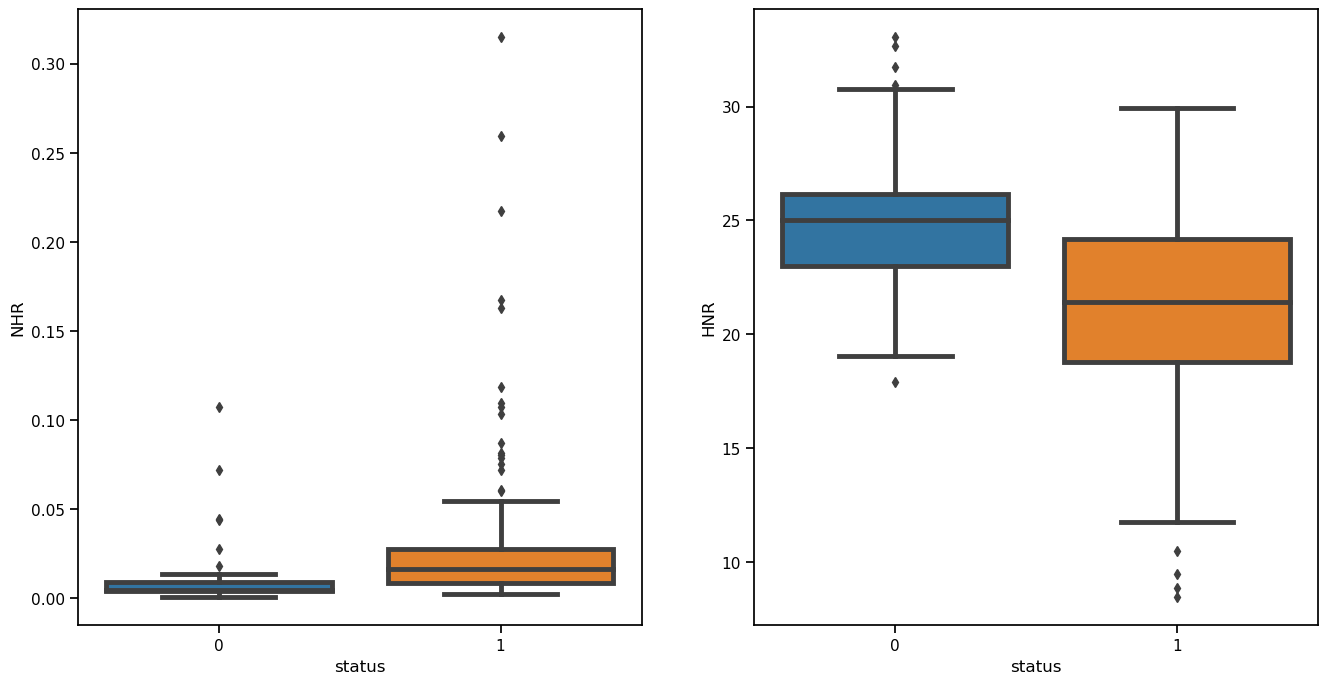

In [62]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='NHR',data=data,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=data,ax=ax[1])

People who have PD(status equal to one) have higher levels of Noise to Harmonic ratio. Also, looking into the HNR ratio people who have PD have lower levels in the same.

<AxesSubplot:xlabel='status', ylabel='MDVP:Fo(Hz)'>

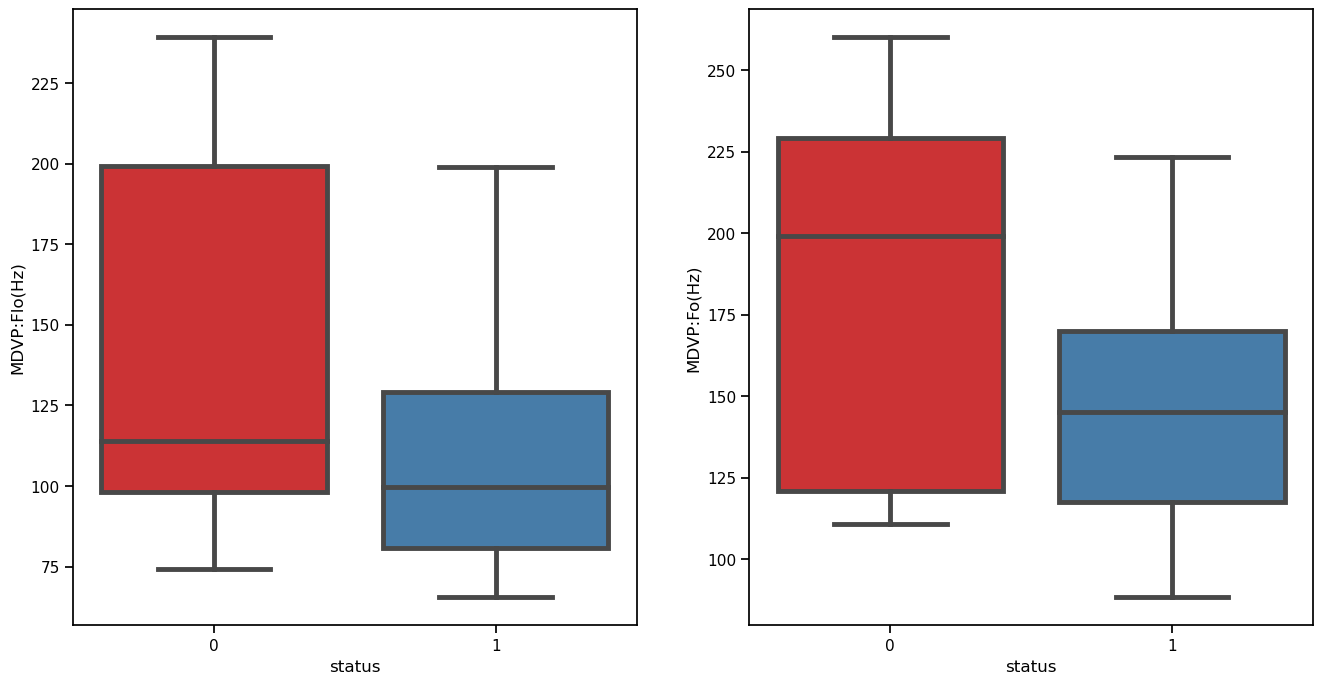

In [63]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=data,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=data,palette="Set1",ax=ax[1])

When we look the relationship between status and MDVP:Fo(Hz) we can see the median value is around 199 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 145 Hz

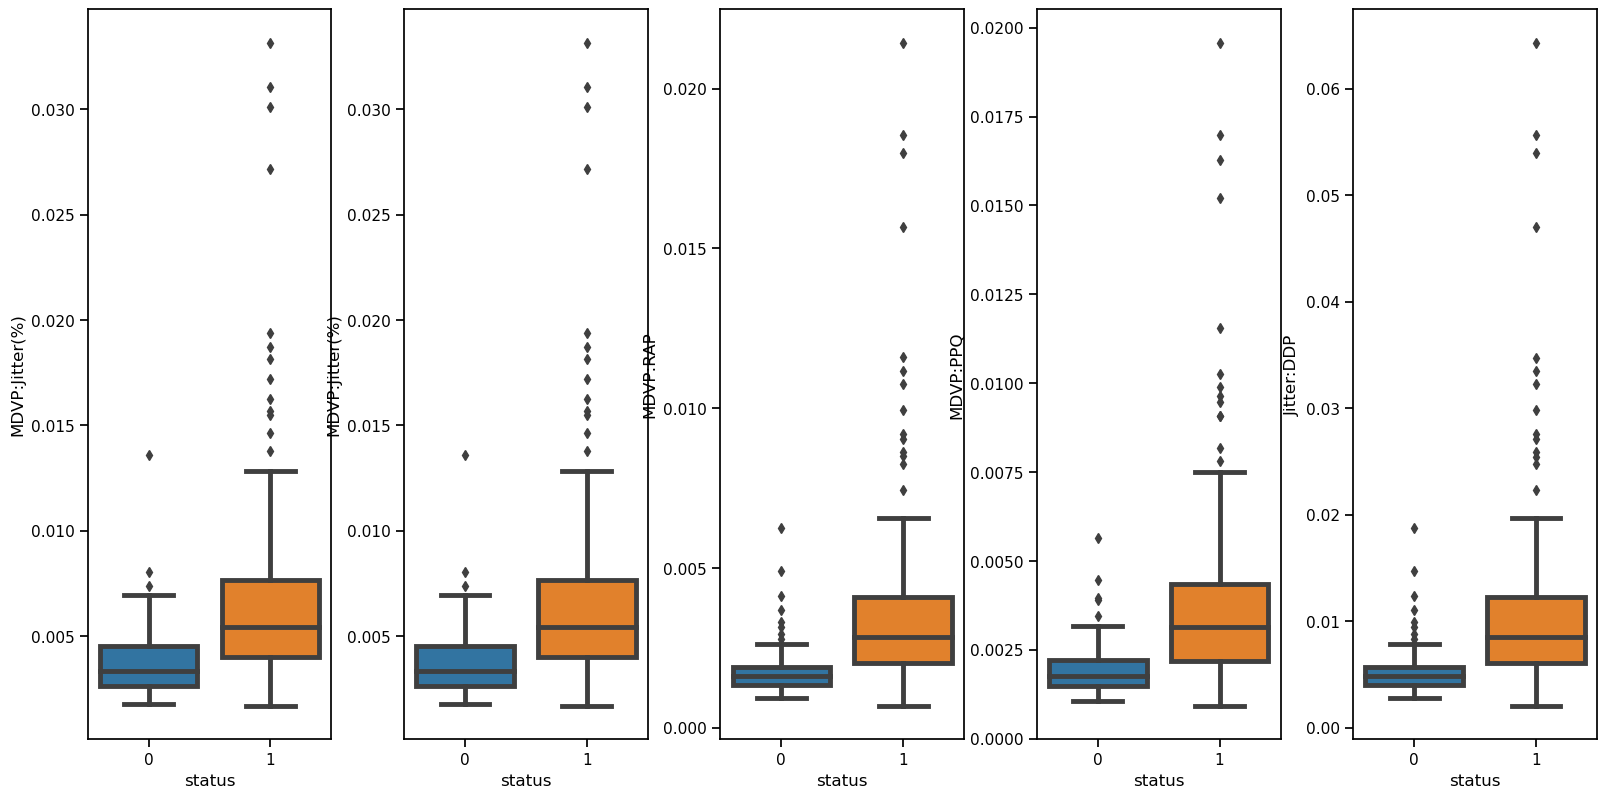

In [64]:
# For categorical predictors
cols = ["MDVP:Jitter(%)","MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=data, ax = axs[i])

People who are suffering for PD tend to have higher jitter %. It seems if the values goes above 0.15 we can confirm the patient is having PD. The variation of fundamental frequency is in a low range for people who is normal.

## Correlation comparision with heat map

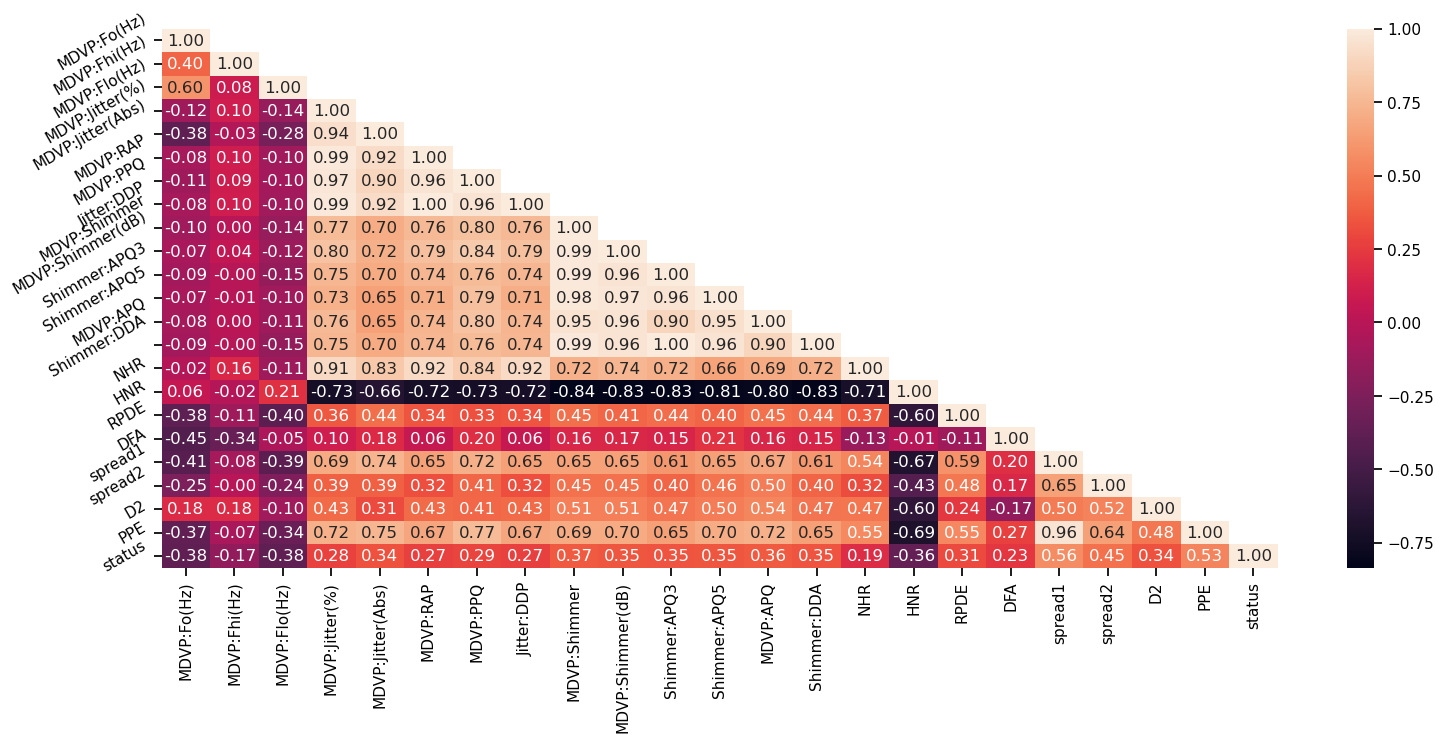

In [65]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

* MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
* MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. This may be because multi-dimensinal voice programs analysis is closely related with these variables
* The target variable status has a weak positive corelation with spread1

## Applying Models

In [66]:
from sklearn import metrics

In [67]:
X = data.drop("status",axis=1)
Y = data["status"]

In [68]:
# Splitting Data into 70% Training data and 30% Testing Data:
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42)
print(len(X_train)),print(len(X_test))

136
59


(None, None)

# SVM (Support Vector Machine) for Classification

In [69]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

In [70]:
svc=SVC() 
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.814


<AxesSubplot:>

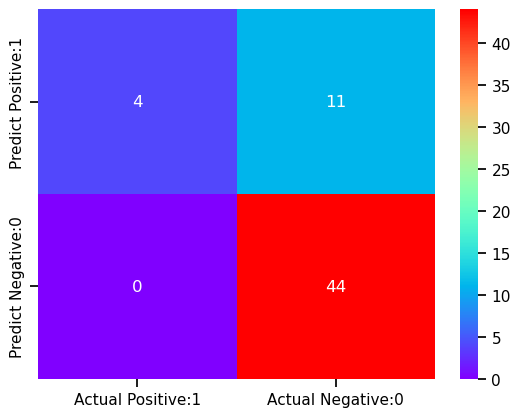

In [71]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rainbow')

In [72]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.27      0.42        15
           1       0.80      1.00      0.89        44

    accuracy                           0.81        59
   macro avg       0.90      0.63      0.65        59
weighted avg       0.85      0.81      0.77        59



# SVM Kernel Functions

A kernel serves as a pivotal tool in SVM (Support Vector Machine), aiding in problem-solving endeavors. By employing kernels, we can traverse to higher dimensions, facilitating smoother computations. Kernels empower us to transcend to an infinite number of dimensions, amplifying the capacity for intricate analyses. They assume a pivotal role in classification tasks, offering insights into patterns embedded within the dataset. Particularly, kernels prove invaluable in tackling non-linear problems through the utilization of a linear classifier.

In certain scenarios, the quest for a hyperplane becomes elusive. This challenge surfaces as we venture into higher dimensions, endeavoring to delineate a hyperplane. To address this predicament, an array of SVM kernel functions comes into play, adept at transforming non-linear data into linear counterparts. Within this notebook, we elucidate eight such esteemed SVM kernel functions.

# **Linear Kernel**


The linear kernel stands as the most fundamental type of kernel, typically exhibiting one-dimensional characteristics. It shines brightest amidst datasets teeming with features.

Linear kernel functions boast superior speed compared to their counterparts.

Linear Kernel Formula
**F(x, xj) = sum( x.xj)**

In this equation, x and xj symbolize the data points we aim to classify.

We will now proceed to construct our SVC (Support Vector Classifier) utilizing a linear kernel.

In [73]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='linear').fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.881


<AxesSubplot:>

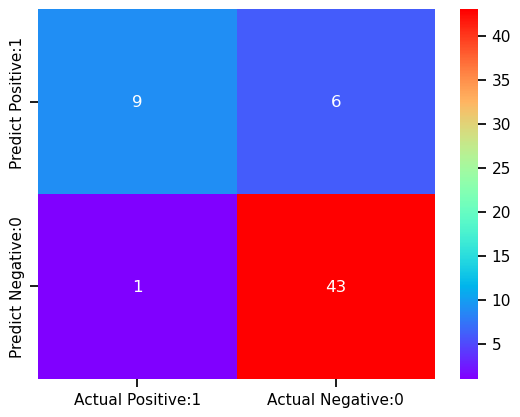

In [74]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rainbow')

In [75]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59



# Gaussian RBF kernel
It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.

### Gaussian Radial Basis Formula
**F(x, xj) = exp(-gamma * ||x - xj||^2)**

The value of gamma varies from 0 to 1. We have to manually provide the value of gamma in the code. The most preferred value for gamma is 0.1.

In [76]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='rbf').fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('Model accuracy with RBF kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with RBF kernel : 0.814


<AxesSubplot:>

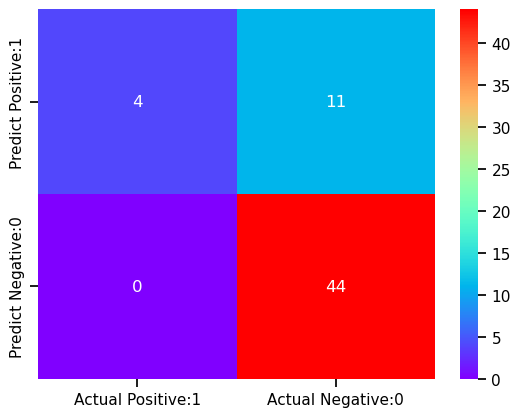

In [77]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rainbow')

In [78]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.27      0.42        15
           1       0.80      1.00      0.89        44

    accuracy                           0.81        59
   macro avg       0.90      0.63      0.65        59
weighted avg       0.85      0.81      0.77        59



# Polynomial Kernel
It is a more generalized representation of the linear kernel. It is not as preferred as other kernel functions as it is less efficient and accurate.

### Polynomial Kernel Formula
**F(x, xj) = (x.xj+1)^d**

Here ‘.’ shows the dot product of both the values, and d denotes the degree. 

F(x, xj) representing the decision boundary to separate the given classes. 

In [79]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='poly', C =1).fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('Model accuracy with Polynomial kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with Polynomial kernel : 0.797


<AxesSubplot:>

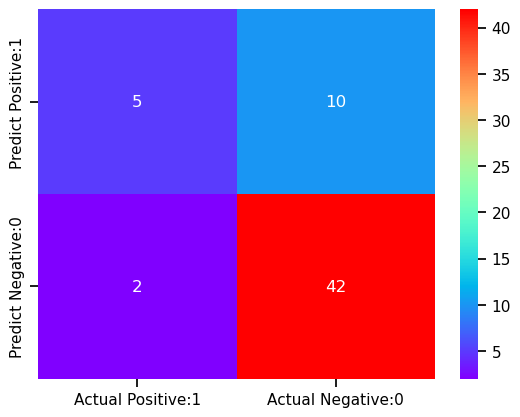

In [80]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rainbow')

In [81]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45        15
           1       0.81      0.95      0.88        44

    accuracy                           0.80        59
   macro avg       0.76      0.64      0.66        59
weighted avg       0.78      0.80      0.77        59



# Sigmoid Kernel
It is mostly preferred for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons.

### Sigmoid Kenel Formula
**F(x, xj) = tanh(αxay + c)**

In [82]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='sigmoid', C =1).fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('Model accuracy with Sigmoid kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with Sigmoid kernel : 0.746


<AxesSubplot:>

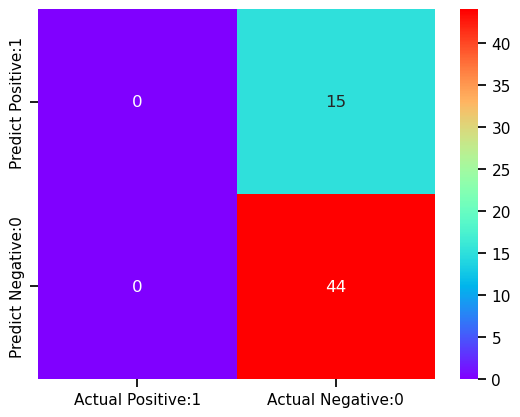

In [83]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rainbow')

In [84]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.75      1.00      0.85        44

    accuracy                           0.75        59
   macro avg       0.37      0.50      0.43        59
weighted avg       0.56      0.75      0.64        59



# String Kernel
String Kernel is commonly used in natural language processing and bioinformatics. This kernel function measures the similarity between strings or sequences of symbols.


In [85]:
from sklearn.metrics.pairwise import pairwise_kernels

# Compute the string kernel matrix
string_kernel_matrix = pairwise_kernels(X_train, metric='linear')

# Apply SVM model using String Kernel function
svm_classifier = SVC(kernel='precomputed', C=1).fit(string_kernel_matrix, y_train)

# Compute the string kernel matrix for the test set
string_kernel_matrix_test = pairwise_kernels(X_test, X_train, metric='linear')

# Predict using the trained SVM model
y_pred = svm_classifier.predict(string_kernel_matrix_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy with String Kernel : {0:0.3f}'.format(accuracy))


Model accuracy with String Kernel : 0.881


<AxesSubplot:>

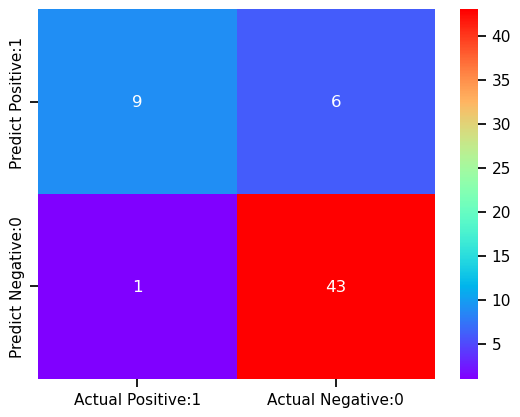

In [86]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rainbow')

In [87]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59



# Conclusion

* Among all these above kernels Linear kernel is giving more accurate Prediction. The model accuracy with Gaussian RBF kernel is 0.881
* So, we'll choose Linear Kernel FUnction in this case.